In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization, Dropout, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10, mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

import matplotlib.pyplot as plt

In [2]:
(trainX, trainy), (testX, testy) = cifar10.load_data()

In [3]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


# Categories


    0: airplane
    1: automobile
    2: bird
    3: cat
    4: deer
    5: dog
    6: frog
    7: horse
    8: ship
    9: truck


In [4]:
catDict = {0: 'airplane',
           1: 'automobile',
           2: 'bird',
           3: 'cat',
           4: 'deer',
           5: 'dog',
           6: 'frog',
           7: 'horse',
           8: 'ship',
           9: 'truck'}

# Visualize

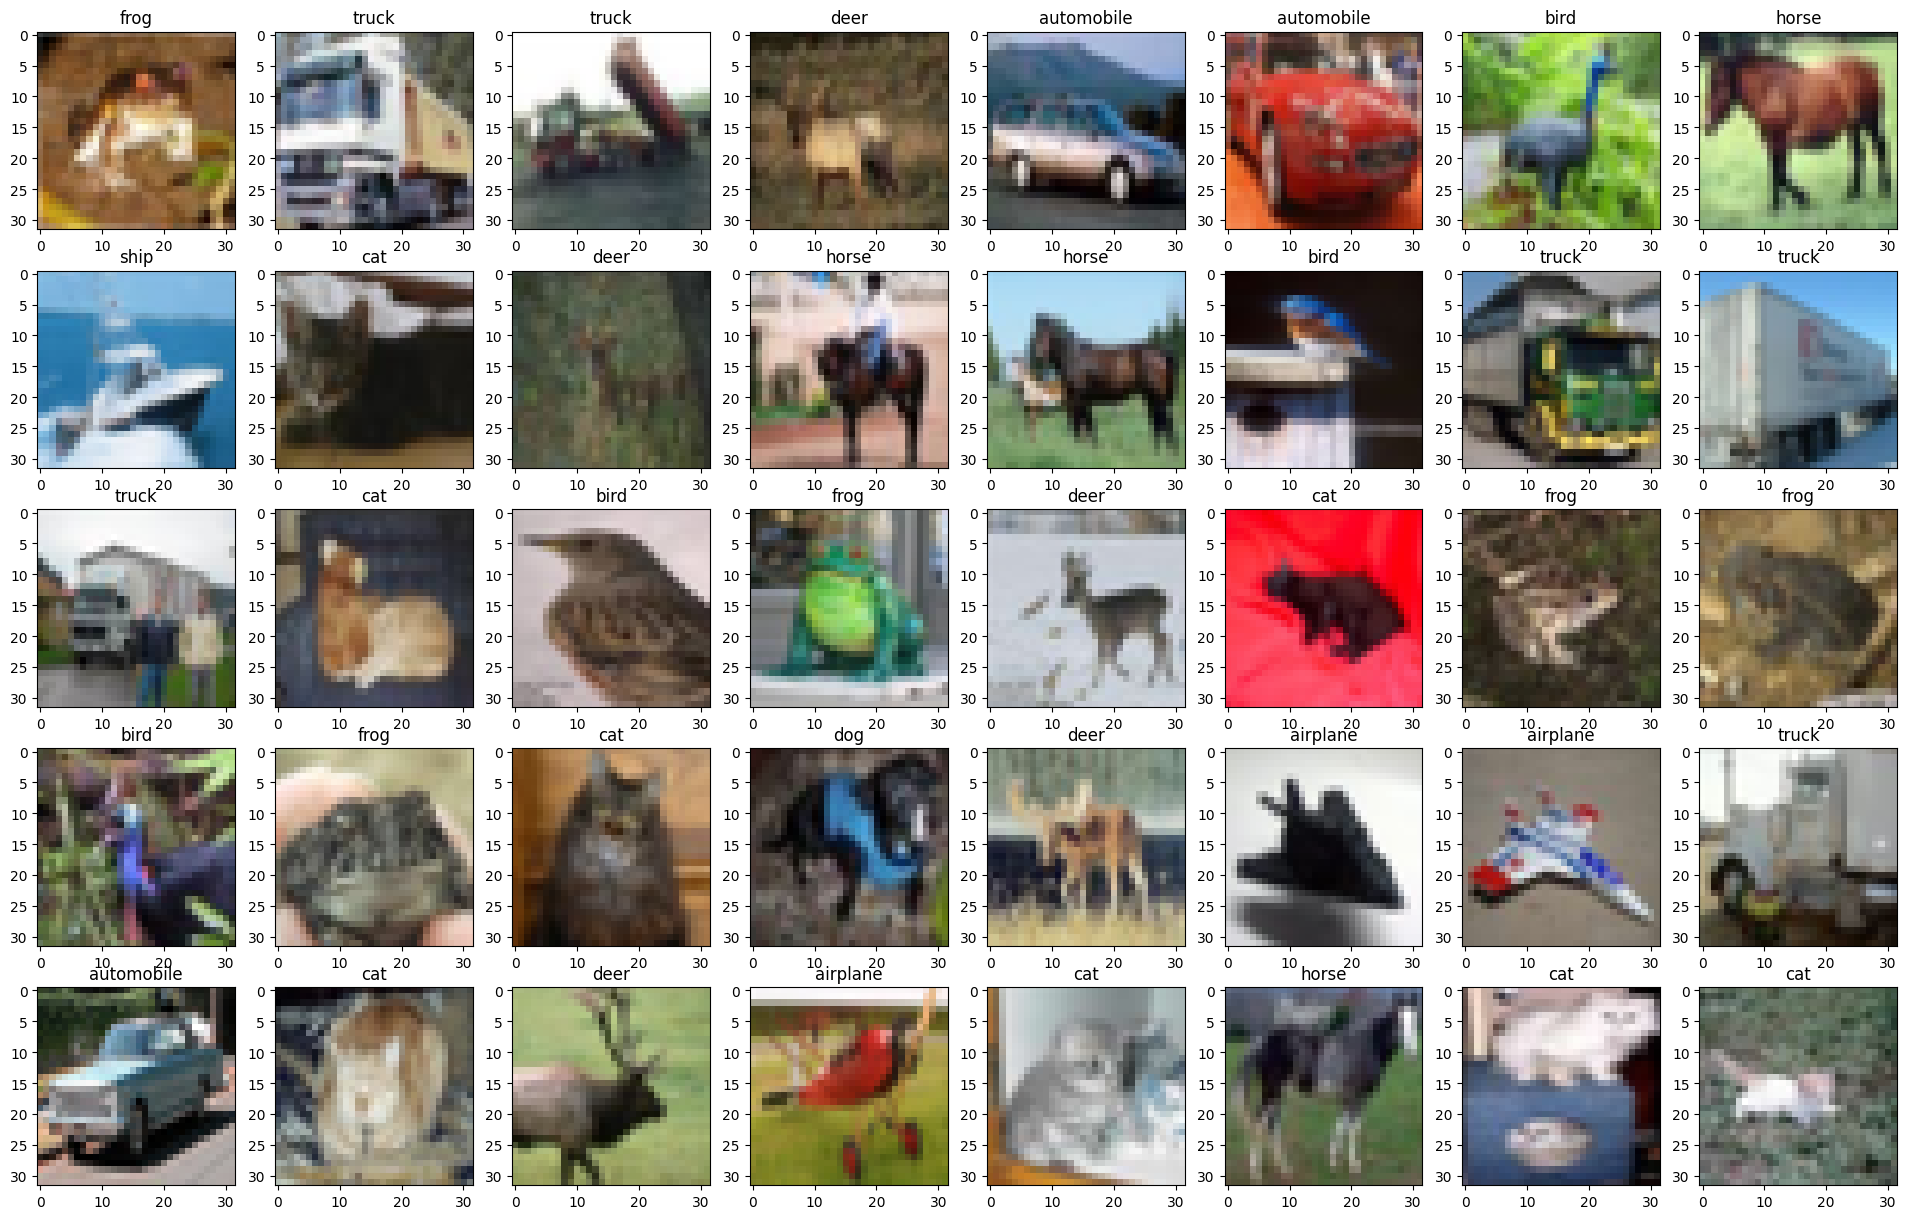

In [5]:
fig, ax = plt.subplots(5,8, figsize=(24, 15))

count = 0
for i in range(5):
  for j in range(8):
    ax[i][j].imshow(trainX[count,:,:,:]);
    ax[i][j].set_title(catDict[trainy[count][0]]);
    count += 1

# APIs

In [6]:
# load train and test dataset
def load_dataset(dataset = 'cifar10'):
  # load dataset
  if dataset == 'cifar10':
    (trainX, trainY), (testX, testY) = cifar10.load_data()
  elif dataset == 'mnist':
    (trainX, trainY), (testX, testY) = mnist.load_data()
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY


	
# scale pixel values to [0, 1]
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm, test_norm

# define simple neural network model
def simpleModel(input_size, neurons=50, opt=Adam(learning_rate=0.01)):
  inputs = Input(shape=input_shape)
  flatten1 = Flatten()(inputs)
  dense1 = Dense(neurons, activation='relu')(flatten1)
  outputs = Dense(10, activation='softmax')(dense1)
  model = Model(inputs, outputs)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

def twoLayerModel(input_size, neurons1=50, neurons2=50, opt=Adam(learning_rate=0.01)):
  inputs = Input(shape=input_shape)
  flatten1 = Flatten()(inputs)
  dense1 = Dense(neurons1, activation='relu')(flatten1)
  dense2 = Dense(neurons2, activation='relu')(dense1)
  outputs = Dense(10, activation='softmax')(dense2)
  model = Model(inputs, outputs)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
  fig, ax = plt.subplots(1,2, figsize=(20, 10))
  # plot loss
  ax[0].set_title('Loss Curves', fontsize=20)
  ax[0].plot(history.history['loss'], label='train')
  ax[0].plot(history.history['val_loss'], label='test')
  ax[0].set_xlabel('Epochs', fontsize=15)
  ax[0].set_ylabel('Loss', fontsize=15)
  ax[0].legend(fontsize=15)
  # plot accuracy
  ax[1].set_title('Classification Accuracy', fontsize=20)
  ax[1].plot(history.history['accuracy'], label='train')
  ax[1].plot(history.history['val_accuracy'], label='test')
  ax[1].set_xlabel('Epochs', fontsize=15)
  ax[1].set_ylabel('Accuracy', fontsize=15)
  ax[1].legend(fontsize=15)

# Load CIFAR 10 and train

In [7]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# Get shape of input
input_shape = trainX[0].shape
# define model
opt = Adam(learning_rate=0.001)
model = simpleModel(input_shape, neurons=100, opt=opt)
# Print model summary
model.summary()
# fit model
history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-15 14:35:56.179456: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-15 14:35:56.187089: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


2022-11-15 14:35:58.766672: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-15 14:35:58.808675: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2022-11-15 14:35:59.349908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


779/782 [============================>.] - ETA: 0s - loss: 1.9099 - accuracy: 0.3153

2022-11-15 14:36:07.322248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 10s 11ms/step - loss: 1.9094 - accuracy: 0.3154 - val_loss: 1.8543 - val_accuracy: 0.3353
Epoch 2/50
782/782 [==============================] - 8s 11ms/step - loss: 1.7568 - accuracy: 0.3728 - val_loss: 1.7053 - val_accuracy: 0.3876
Epoch 3/50
782/782 [==============================] - 8s 10ms/step - loss: 1.6881 - accuracy: 0.3988 - val_loss: 1.6508 - val_accuracy: 0.4127
Epoch 4/50
782/782 [==============================] - 8s 10ms/step - loss: 1.6561 - accuracy: 0.4120 - val_loss: 1.6567 - val_accuracy: 0.4068
Epoch 5/50
782/782 [==============================] - 8s 10ms/step - loss: 1.6252 - accuracy: 0.4226 - val_loss: 1.6180 - val_accuracy: 0.4235
Epoch 6/50
782/782 [==============================] - 8s 10ms/step - loss: 1.6087 - accuracy: 0.4278 - val_loss: 1.6210 - val_accuracy: 0.4222
Epoch 7/50
782/782 [==============================] - 7s 10ms/step - loss: 1.5935 - accuracy: 0.4330 - val_loss: 1.6194 - val_accuracy: 0.4181
Epoch 8/5

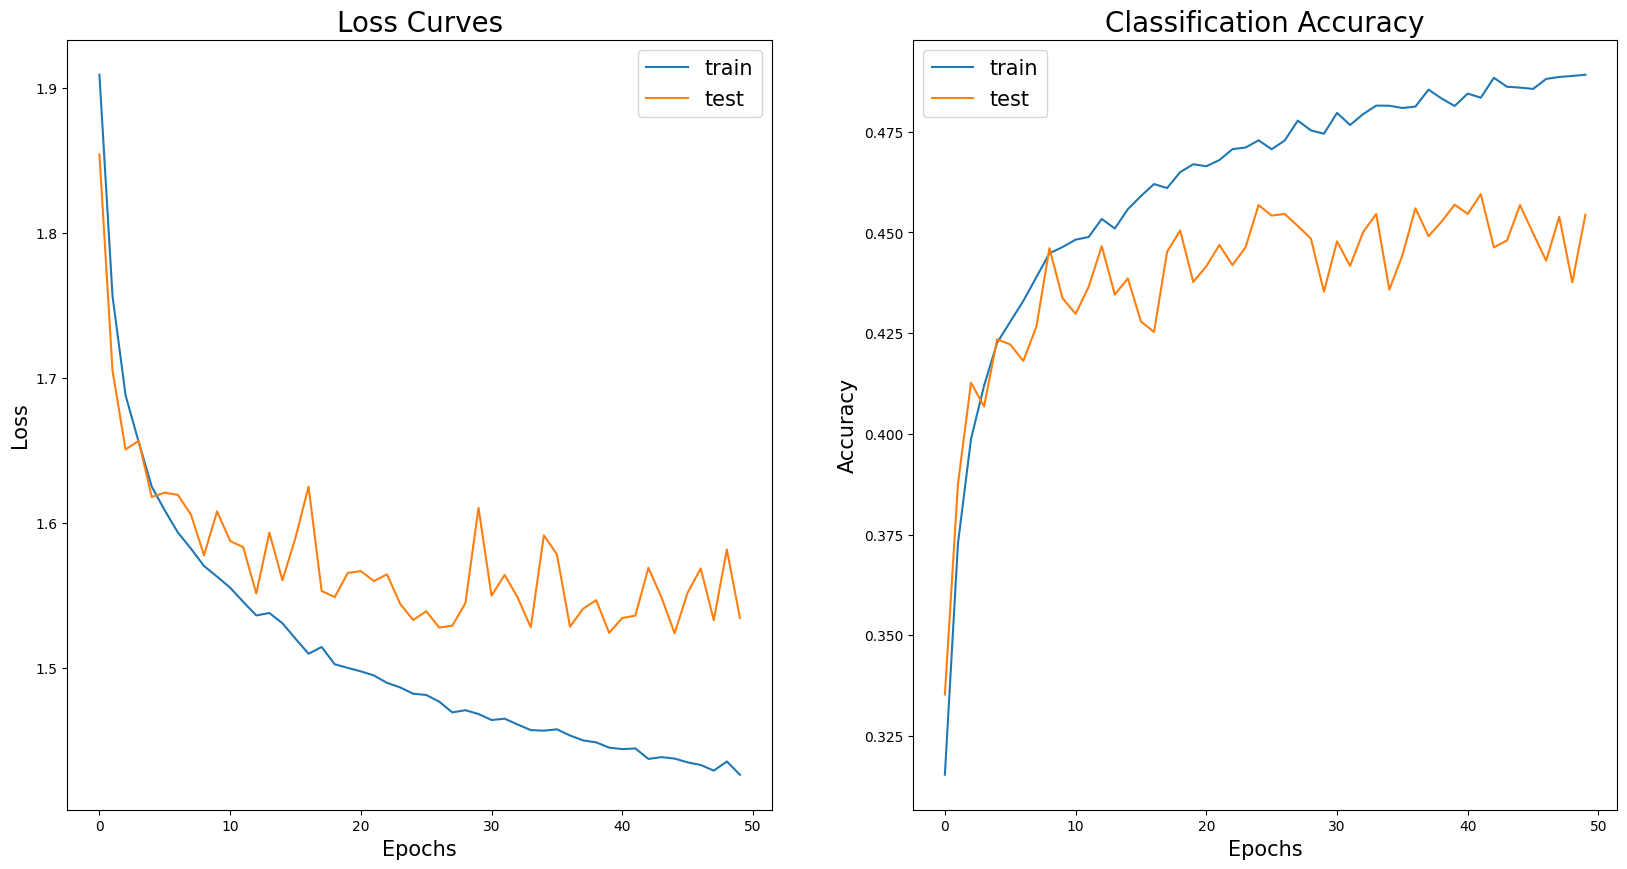

In [8]:
# loss curves & accuracy
summarize_diagnostics(history)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               307300    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 318,410
Trainable params: 318,410
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
  1/782 [..............................] - ETA: 11:33 - loss: 2.4068 - accuracy: 0.0938

2022-11-15 14:42:53.928057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.8747 - accuracy: 0.3196

2022-11-15 14:43:01.763007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 10s 11ms/step - loss: 1.8747 - accuracy: 0.3196 - val_loss: 1.7055 - val_accuracy: 0.3847
Epoch 2/50
782/782 [==============================] - 8s 11ms/step - loss: 1.7046 - accuracy: 0.3871 - val_loss: 1.6395 - val_accuracy: 0.4119
Epoch 3/50
782/782 [==============================] - 8s 11ms/step - loss: 1.6383 - accuracy: 0.4108 - val_loss: 1.6201 - val_accuracy: 0.4154
Epoch 4/50
782/782 [==============================] - 8s 10ms/step - loss: 1.5981 - accuracy: 0.4261 - val_loss: 1.6227 - val_accuracy: 0.4218
Epoch 5/50
782/782 [==============================] - 8s 10ms/step - loss: 1.5647 - accuracy: 0.4381 - val_loss: 1.5549 - val_accuracy: 0.4465
Epoch 6/50
782/782 [==============================] - 9s 11ms/step - loss: 1.5336 - accuracy: 0.4486 - val_loss: 1.5385 - val_accuracy: 0.4451
Epoch 7/50
782/782 [==============================] - 9s 11ms/step - loss: 1.5141 - accuracy: 0.4562 - val_loss: 1.5141 - val_accuracy: 0.4613
Epoch 8/5

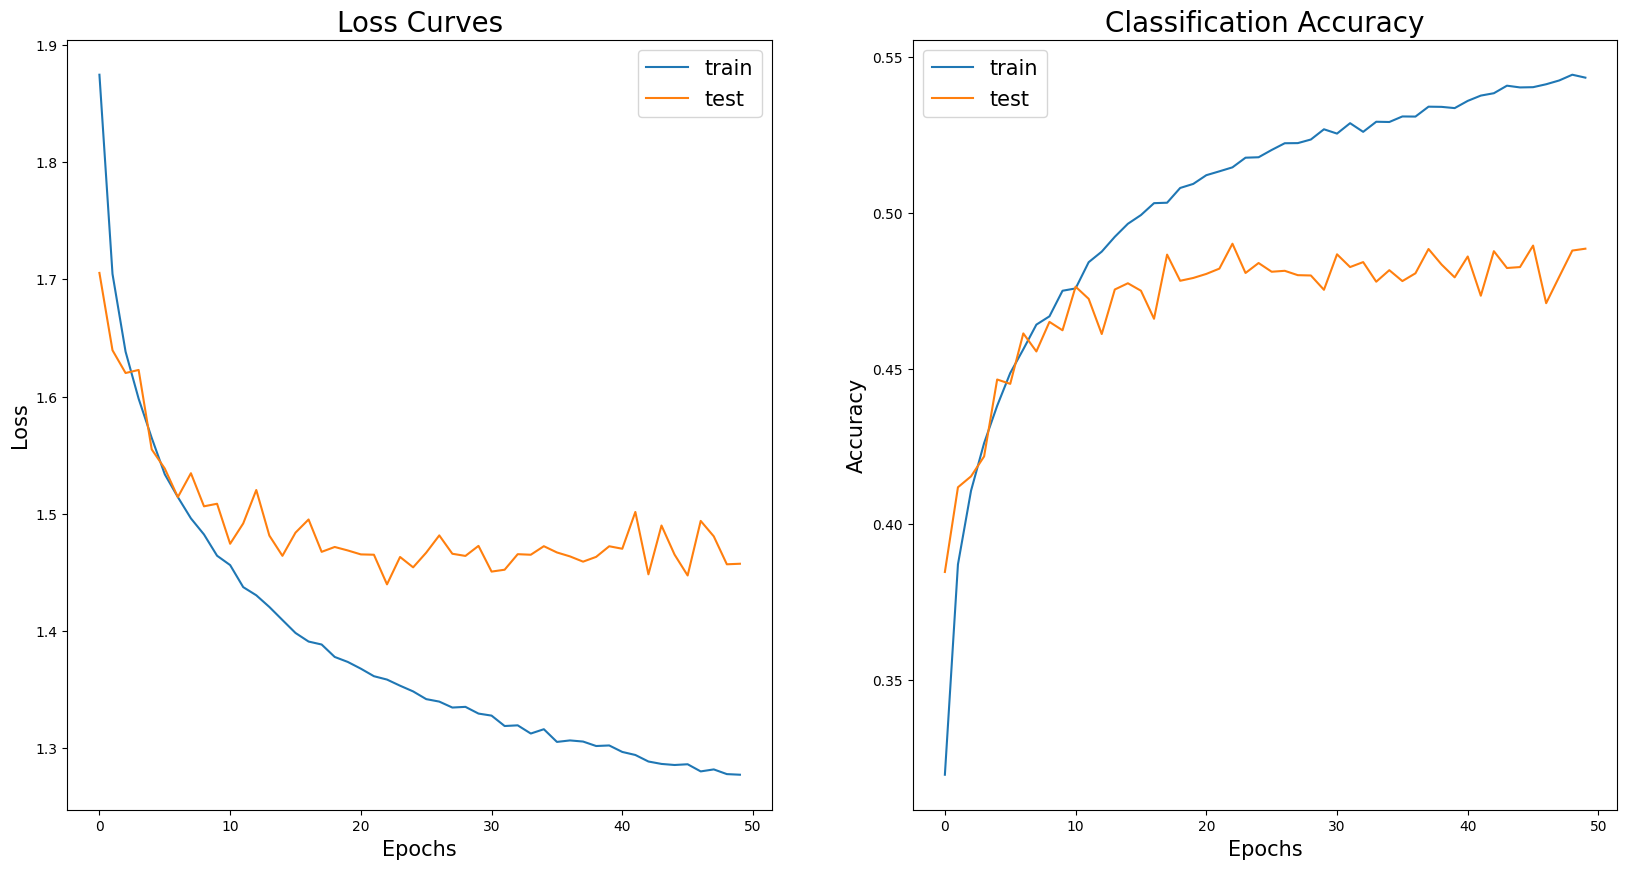

In [9]:
# Use a slightly deeper model (2 layers)
# 2 layers
# define model
opt = Adam(learning_rate=0.001)
model = twoLayerModel(input_shape, neurons1=100, neurons2=100, opt=opt)
# Print model summary
model.summary()
# fit model
history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

# loss curves & accuracy
summarize_diagnostics(history)

# Load MNIST and train

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


2022-11-15 14:50:17.702654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.5828 - accuracy: 0.8429

2022-11-15 14:50:27.179055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 11s 11ms/step - loss: 0.5828 - accuracy: 0.8429 - val_loss: 0.3116 - val_accuracy: 0.9136
Epoch 2/50
938/938 [==============================] - 10s 10ms/step - loss: 0.3037 - accuracy: 0.9150 - val_loss: 0.2791 - val_accuracy: 0.9227
Epoch 3/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2728 - accuracy: 0.9234 - val_loss: 0.2608 - val_accuracy: 0.9283
Epoch 4/50
938/938 [==============================] - 9s 10ms/step - loss: 0.2533 - accuracy: 0.9291 - val_loss: 0.2486 - val_accuracy: 0.9292
Epoch 5/50
938/938 [==============================] - 8s 9ms/step - loss: 0.2399 - accuracy: 0.9325 - val_loss: 0.2404 - val_accuracy: 0.9325
Epoch 6/50
938/938 [==============================] - 8s 9ms/step - loss: 0.2307 - accuracy: 0.9359 - val_loss: 0.2339 - val_accuracy: 0.9352
Epoch 7/50
938/938 [==============================] - 9s 9ms/step - loss: 0.2231 - accuracy: 0.9380 - val_loss: 0.2313 - val_accuracy: 0.9372
Epoch 8/50


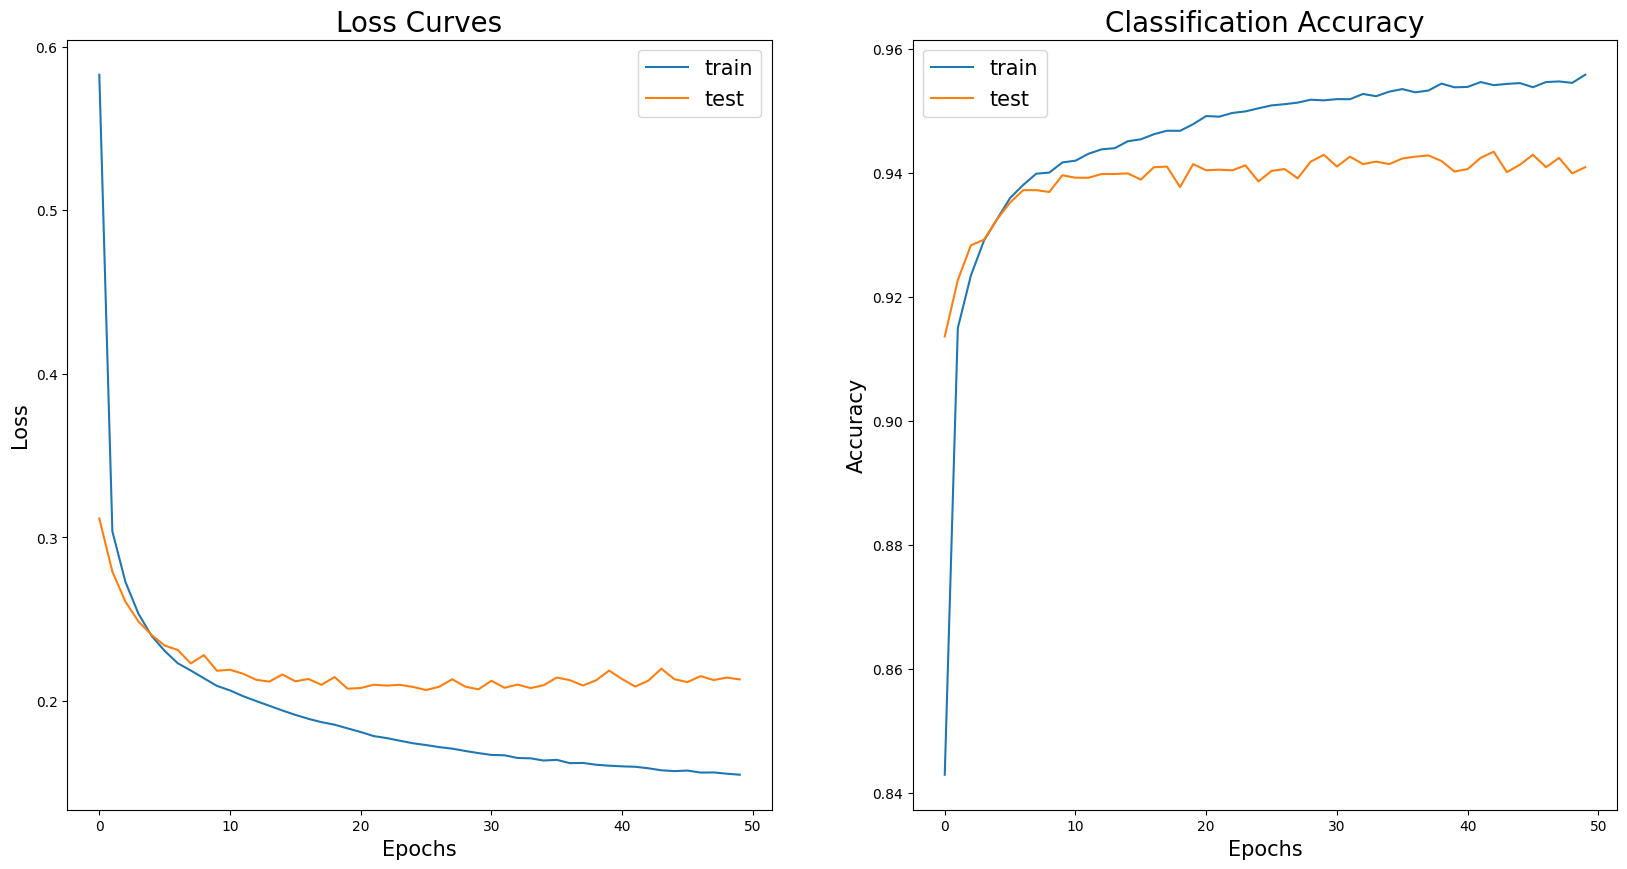

In [10]:
# load dataset
trainX, trainY, testX, testY = load_dataset('mnist')
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# Expand dimensions to take care of channels
trainX = np.expand_dims(trainX, trainX.ndim)
testX = np.expand_dims(testX, testX.ndim)
# Get shape of input
input_shape = trainX[0].shape
# define model
opt = Adam(learning_rate=0.001)
model = simpleModel(input_shape, neurons=10, opt=opt)
# Print model summary
model.summary()
# fit model
history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

# loss curves & accuracy
summarize_diagnostics(history)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
  6/938 [..............................] - ETA: 10s - loss: 2.1436 - accuracy: 0.2708 

2022-11-15 14:57:41.090462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.2791 - accuracy: 0.9199

2022-11-15 14:57:49.683589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 10s 10ms/step - loss: 0.2791 - accuracy: 0.9199 - val_loss: 0.1402 - val_accuracy: 0.9600
Epoch 2/50
938/938 [==============================] - 9s 10ms/step - loss: 0.1187 - accuracy: 0.9644 - val_loss: 0.1112 - val_accuracy: 0.9656
Epoch 3/50
938/938 [==============================] - 9s 10ms/step - loss: 0.0827 - accuracy: 0.9749 - val_loss: 0.0997 - val_accuracy: 0.9679
Epoch 4/50
938/938 [==============================] - 9s 10ms/step - loss: 0.0633 - accuracy: 0.9807 - val_loss: 0.0895 - val_accuracy: 0.9722
Epoch 5/50
938/938 [==============================] - 9s 10ms/step - loss: 0.0505 - accuracy: 0.9834 - val_loss: 0.0940 - val_accuracy: 0.9742
Epoch 6/50
938/938 [==============================] - 9s 10ms/step - loss: 0.0411 - accuracy: 0.9874 - val_loss: 0.0826 - val_accuracy: 0.9767
Epoch 7/50
938/938 [==============================] - 9s 10ms/step - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0931 - val_accuracy: 0.9738
Epoch 8/5

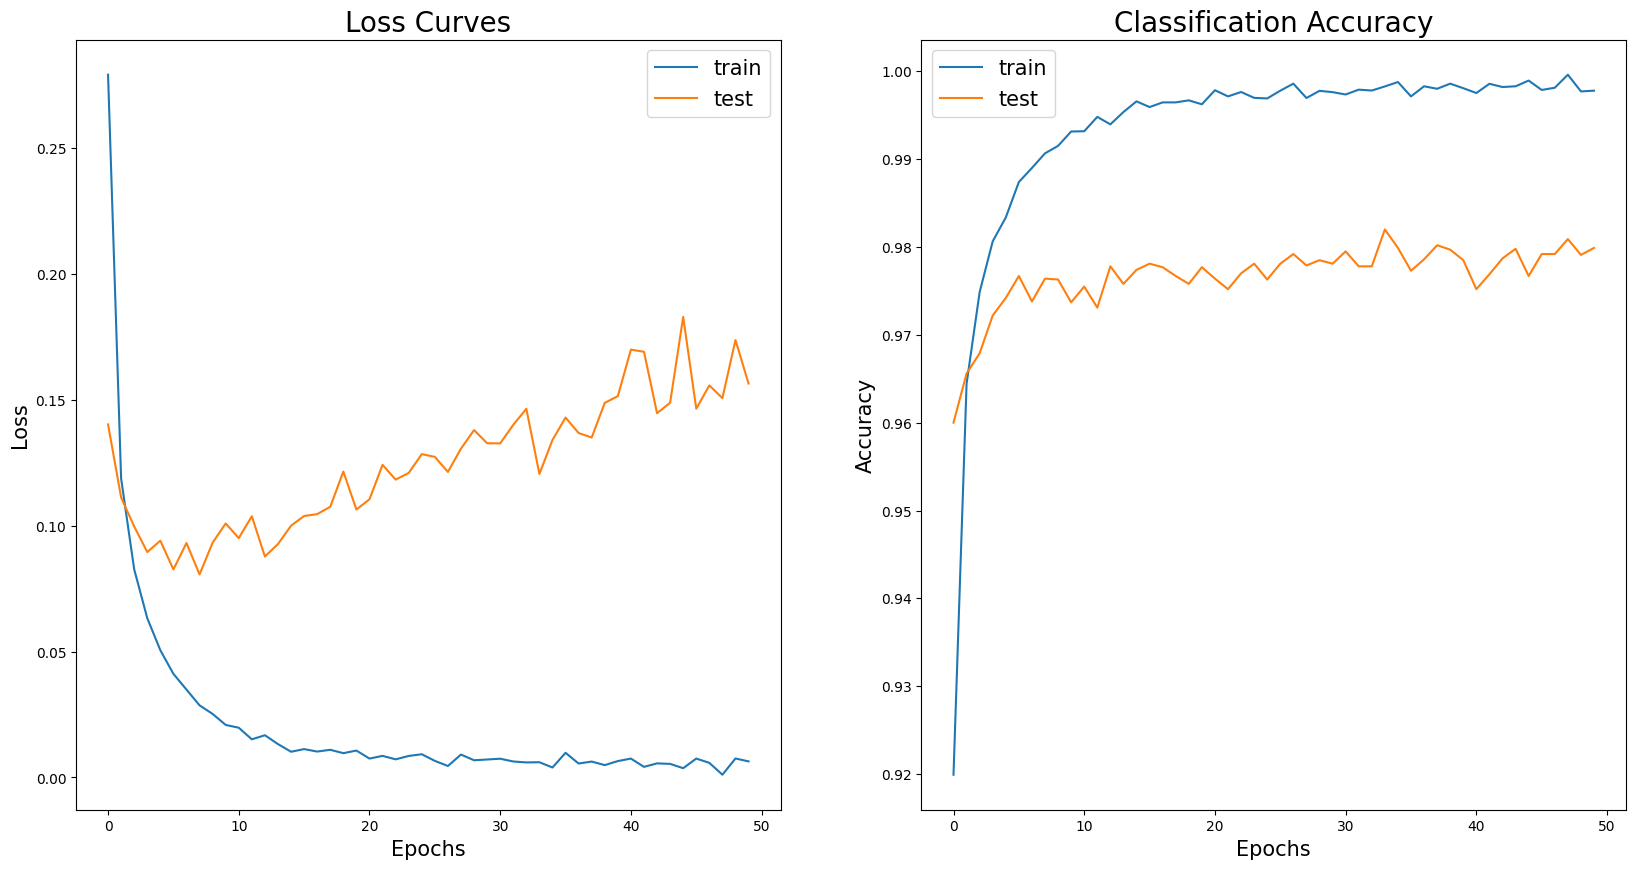

In [11]:
# Use a slightly deeper model (2 layers)
# 2 layers
# define model
opt = Adam(learning_rate=0.001)
model = twoLayerModel(input_shape, neurons1=100, neurons2=100, opt=opt)
# Print model summary
model.summary()
# fit model
history = model.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

# loss curves & accuracy
summarize_diagnostics(history)

# How do we find the point where the model starts to overfit and stop training there?

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
  6/938 [..............................] - ETA: 9s - loss: 2.2248 - accuracy: 0.1641  

2022-11-15 15:05:51.834238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.3517 - accuracy: 0.9042

2022-11-15 15:06:02.035227: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 12s 12ms/step - loss: 0.3517 - accuracy: 0.9042 - val_loss: 0.1749 - val_accuracy: 0.9485
Epoch 2/50
938/938 [==============================] - 10s 11ms/step - loss: 0.1546 - accuracy: 0.9553 - val_loss: 0.1393 - val_accuracy: 0.9584
Epoch 3/50
938/938 [==============================] - 10s 10ms/step - loss: 0.1124 - accuracy: 0.9674 - val_loss: 0.1109 - val_accuracy: 0.9678
Epoch 4/50
938/938 [==============================] - 12s 13ms/step - loss: 0.0866 - accuracy: 0.9742 - val_loss: 0.0968 - val_accuracy: 0.9684
Epoch 5/50
938/938 [==============================] - 12s 13ms/step - loss: 0.0686 - accuracy: 0.9794 - val_loss: 0.0984 - val_accuracy: 0.9689
Epoch 6/50
938/938 [==============================] - 11s 11ms/step - loss: 0.0579 - accuracy: 0.9826 - val_loss: 0.0826 - val_accuracy: 0.9731
Epoch 7/50
938/938 [==============================] - 10s 10ms/step - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.0892 - val_accuracy: 0.9725
Epo

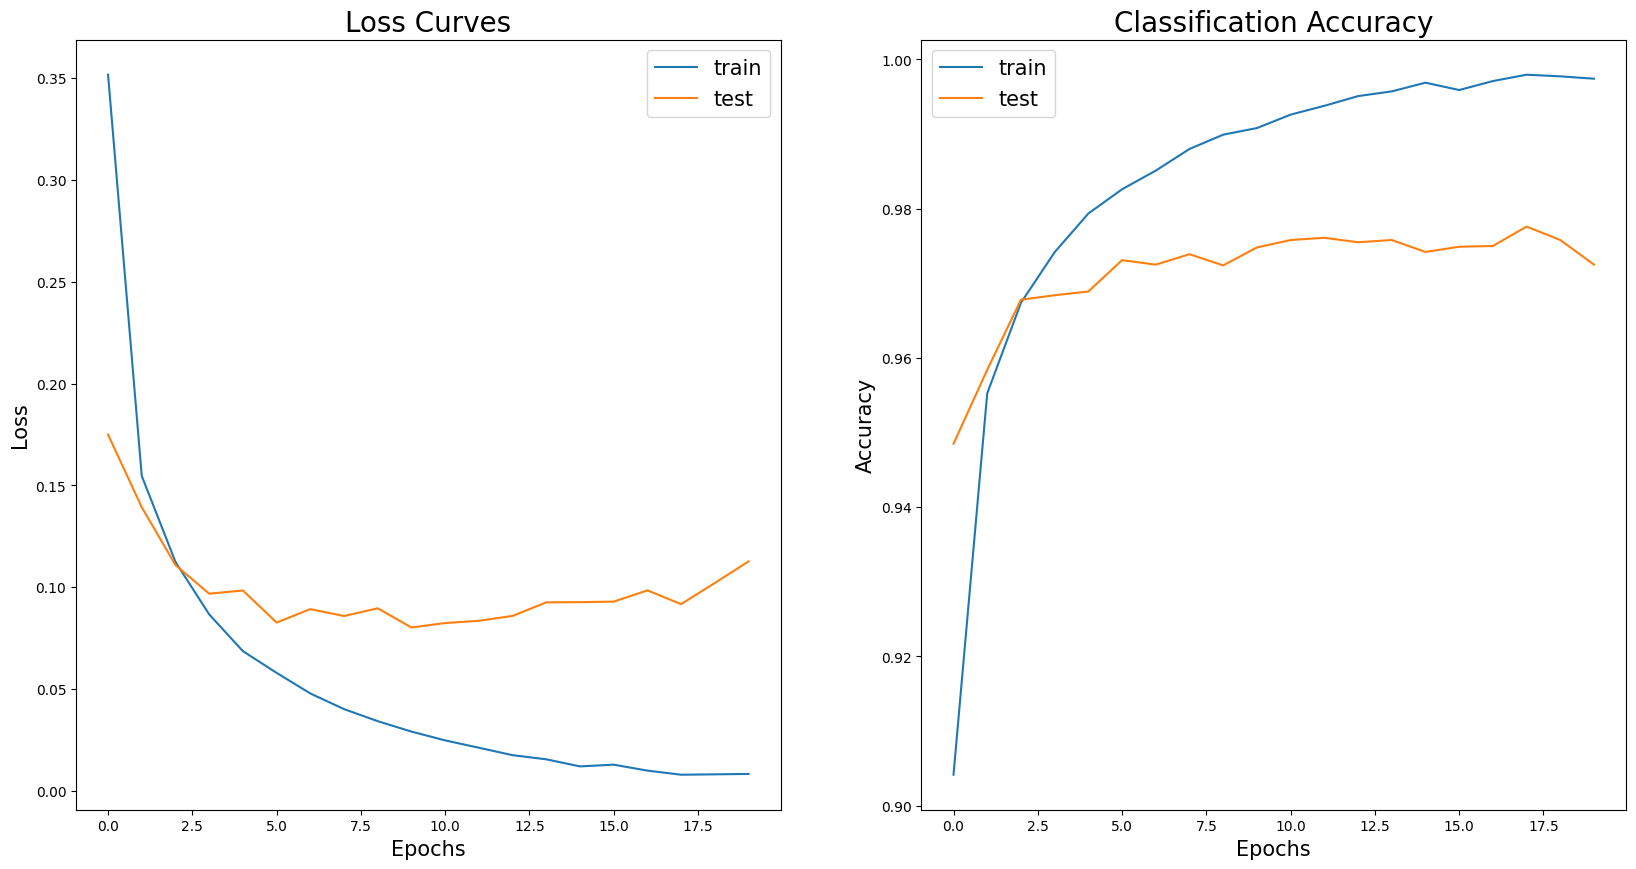

In [12]:
# We will use the EarlyStopping API in keras
# early stopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=10,
                   restore_best_weights=True)

# define model
opt = Adam(learning_rate=0.0005)
model = twoLayerModel(input_shape, neurons1=100, neurons2=100, opt=opt)
# Print model summary
model.summary()
# fit model
history = model.fit(trainX, trainY,
                    epochs=50,
                    batch_size=64,
                    validation_data=(testX, testY),
                    verbose=1,
                    callbacks=[es])
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

# loss curves & accuracy
summarize_diagnostics(history)

# Convolutional Neural Networks (CNNs)

In [13]:
# define a simple CNN architecture
def simpleCNN(input_size, filters=32,opt=Adam(learning_rate=0.01)):
  inputs = Input(shape=input_shape)
  conv1 = Conv2D(filters, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_size)(inputs)
  flatten1 = Flatten()(conv1)
  outputs = Dense(10, activation='softmax')(flatten1)
  model = Model(inputs, outputs)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                250890    
Total params: 251,210
Trainable params: 251,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


2022-11-15 15:09:12.682032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.2792 - accuracy: 0.9228

2022-11-15 15:09:24.002652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 12s 12ms/step - loss: 0.2792 - accuracy: 0.9228 - val_loss: 0.1260 - val_accuracy: 0.9659
Epoch 2/50
938/938 [==============================] - 11s 12ms/step - loss: 0.1040 - accuracy: 0.9713 - val_loss: 0.0871 - val_accuracy: 0.9732
Epoch 3/50
938/938 [==============================] - 11s 12ms/step - loss: 0.0718 - accuracy: 0.9801 - val_loss: 0.0663 - val_accuracy: 0.9794
Epoch 4/50
938/938 [==============================] - 11s 11ms/step - loss: 0.0569 - accuracy: 0.9843 - val_loss: 0.0636 - val_accuracy: 0.9803
Epoch 5/50
938/938 [==============================] - 11s 12ms/step - loss: 0.0467 - accuracy: 0.9863 - val_loss: 0.0611 - val_accuracy: 0.9813
Epoch 6/50
938/938 [==============================] - 11s 11ms/step - loss: 0.0401 - accuracy: 0.9886 - val_loss: 0.0601 - val_accuracy: 0.9819
Epoch 7/50
938/938 [==============================] - 11s 12ms/step - loss: 0.0345 - accuracy: 0.9898 - val_loss: 0.0590 - val_accuracy: 0.9816
Epo

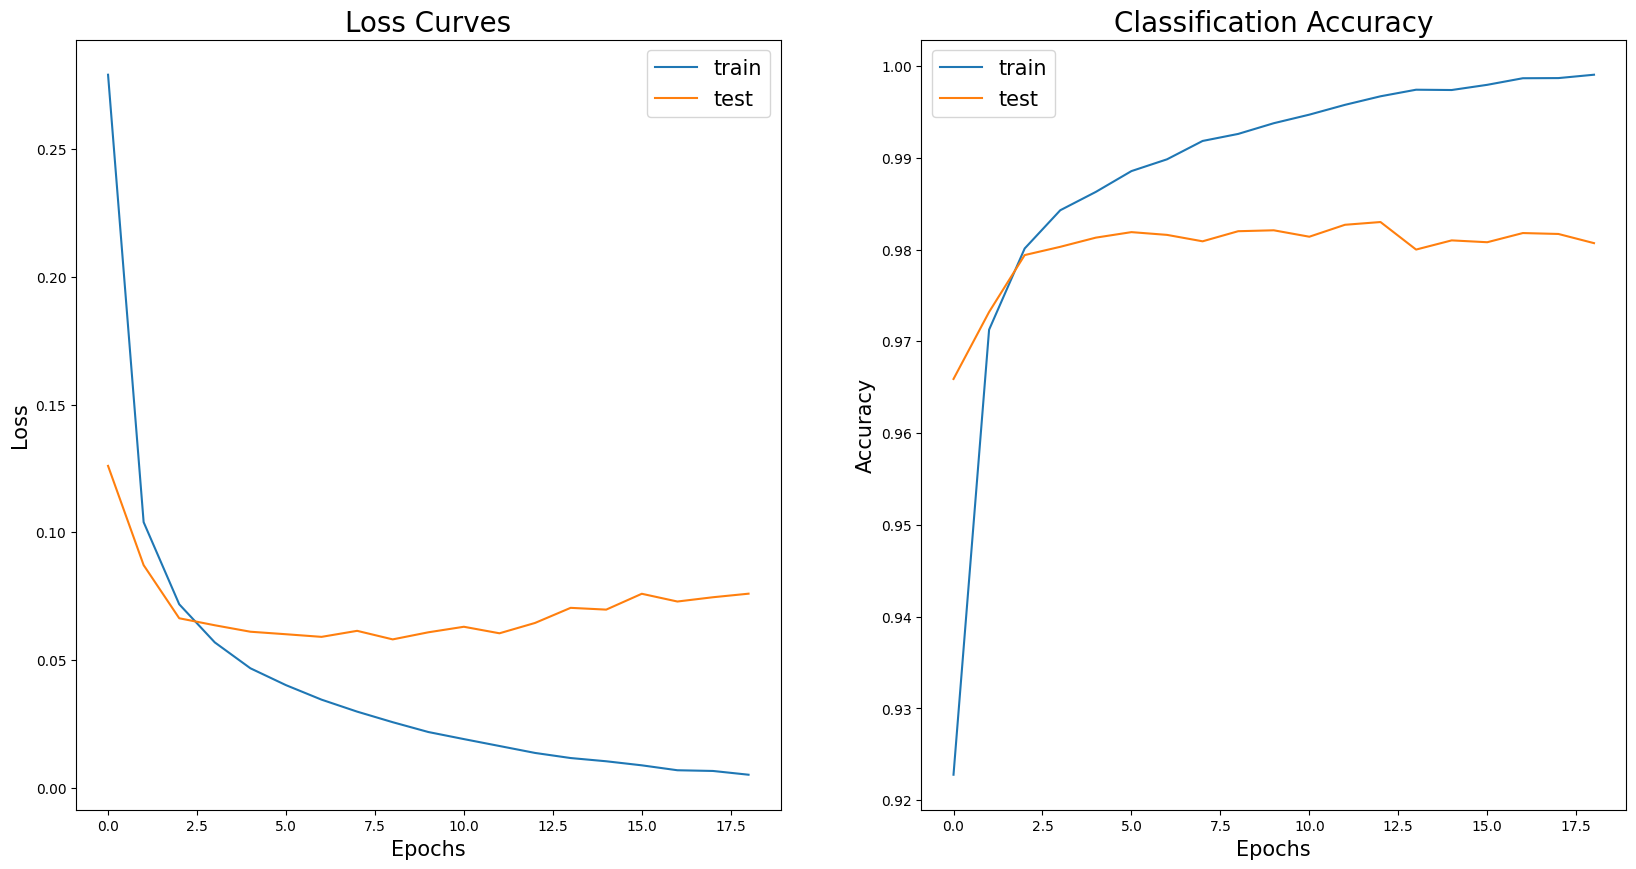

In [14]:
# early stopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=10,
                   restore_best_weights=True)

# define model
opt = Adam(learning_rate=0.0005)
modelCNN = simpleCNN(input_shape, filters=32, opt=opt)
# Print model summary
modelCNN.summary()
# fit model
history = modelCNN.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=1, callbacks=[es])
# evaluate model
_, acc = modelCNN.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

# loss curves & accuracy
summarize_diagnostics(history)

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
flatten_6 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                327690    
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


2022-11-15 15:12:51.650173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.5487 - accuracy: 0.4558

2022-11-15 15:13:04.646546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 14s 17ms/step - loss: 1.5487 - accuracy: 0.4558 - val_loss: 1.3934 - val_accuracy: 0.5019
Epoch 2/50
782/782 [==============================] - 11s 14ms/step - loss: 1.2700 - accuracy: 0.5588 - val_loss: 1.2707 - val_accuracy: 0.5535
Epoch 3/50
782/782 [==============================] - 10s 13ms/step - loss: 1.1707 - accuracy: 0.5946 - val_loss: 1.2290 - val_accuracy: 0.5666
Epoch 4/50
782/782 [==============================] - 10s 13ms/step - loss: 1.1087 - accuracy: 0.6177 - val_loss: 1.2237 - val_accuracy: 0.5716
Epoch 5/50
782/782 [==============================] - 10s 13ms/step - loss: 1.0548 - accuracy: 0.6366 - val_loss: 1.1973 - val_accuracy: 0.5830
Epoch 6/50
782/782 [==============================] - 10s 13ms/step - loss: 1.0118 - accuracy: 0.6526 - val_loss: 1.1636 - val_accuracy: 0.5915
Epoch 7/50
782/782 [==============================] - 10s 13ms/step - loss: 0.9687 - accuracy: 0.6685 - val_loss: 1.1646 - val_accuracy: 0.5933
Epo

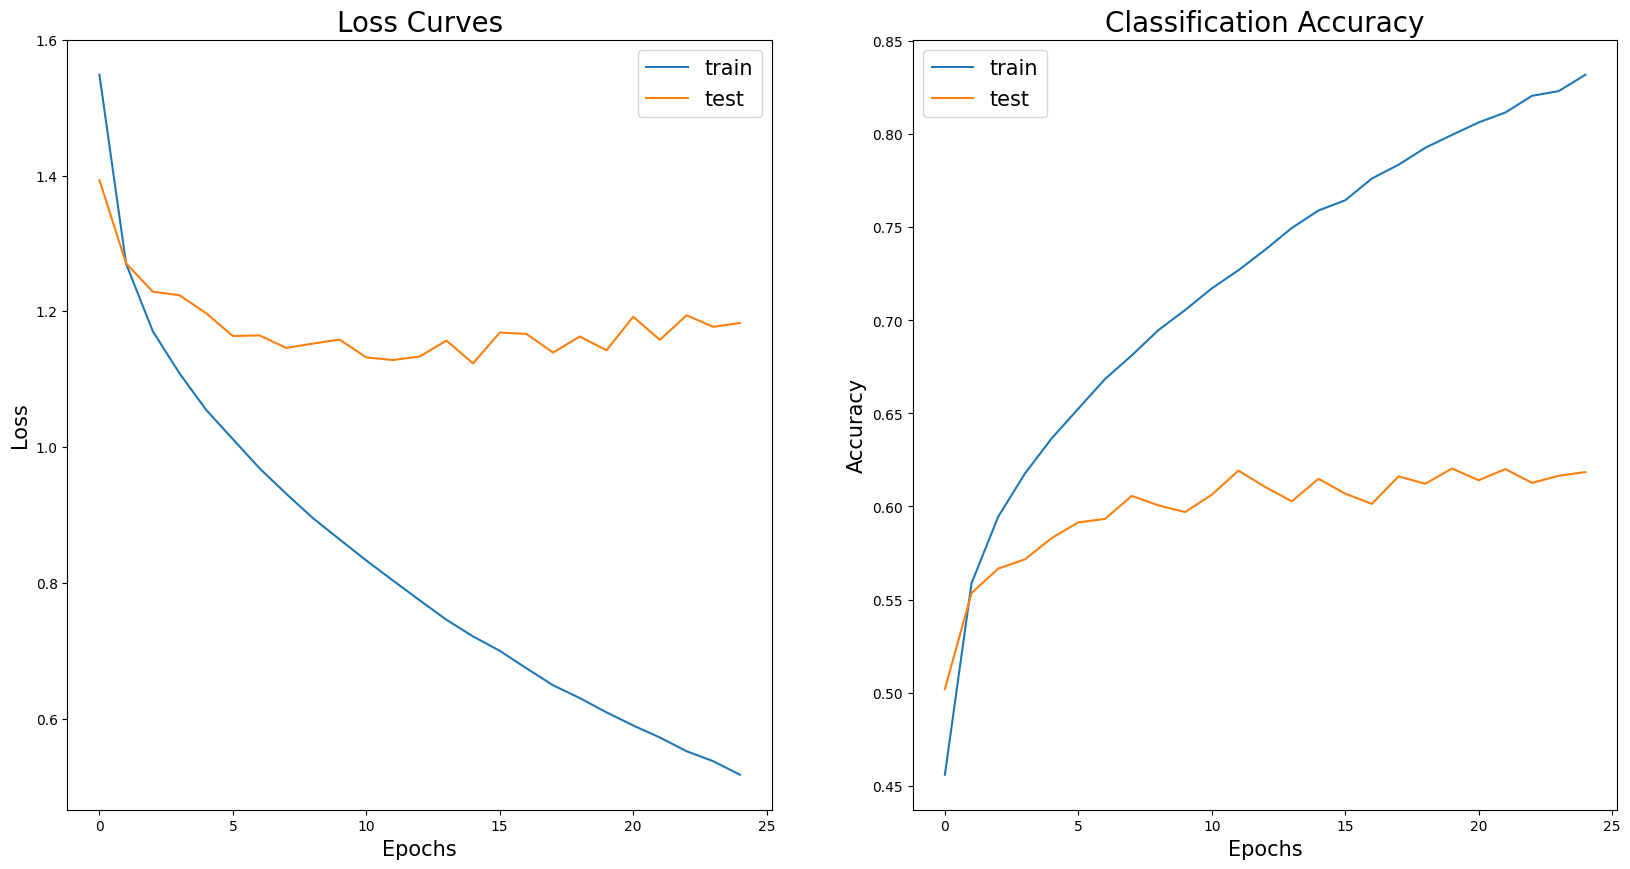

In [15]:
# Let us go back to CIFAR 10 and see if the CNN works better!

# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# Get shape of input
input_shape = trainX[0].shape

# early stopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=10,
                   restore_best_weights=True)

# define model
opt = Adam(learning_rate=0.0005)
modelCNN = simpleCNN(input_shape, filters=32, opt=opt)
# Print model summary
modelCNN.summary()
# fit model
history = modelCNN.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=1, callbacks=[es])
# evaluate model
_, acc = modelCNN.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

# loss curves & accuracy
summarize_diagnostics(history)

# Is a deeper CNN better?

In [16]:
# Define a two-layer CNN model
def twoLayerCNN(input_size, filters1=32, filters2=64, opt=Adam(learning_rate=0.01)):
  inputs = Input(shape=input_shape)
  conv1 = Conv2D(filters1, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_size)(inputs)
  conv2 = Conv2D(filters2, kernel_size=(3,3), activation='relu', padding='same')(conv1)
  flatten1 = Flatten()(conv2)
  outputs = Dense(10, activation='softmax')(flatten1)
  model = Model(inputs, outputs)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
flatten_7 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                655370    
Total params: 674,762
Trainable params: 674,762
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


2022-11-15 15:17:19.023226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.6426 - accuracy: 0.4185

2022-11-15 15:17:40.188520: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 23s 28ms/step - loss: 1.6426 - accuracy: 0.4185 - val_loss: 1.4610 - val_accuracy: 0.4824
Epoch 2/50
782/782 [==============================] - 24s 31ms/step - loss: 1.3705 - accuracy: 0.5210 - val_loss: 1.3142 - val_accuracy: 0.5399
Epoch 3/50
782/782 [==============================] - 22s 28ms/step - loss: 1.2607 - accuracy: 0.5579 - val_loss: 1.2492 - val_accuracy: 0.5599
Epoch 4/50
782/782 [==============================] - 22s 28ms/step - loss: 1.1849 - accuracy: 0.5876 - val_loss: 1.2089 - val_accuracy: 0.5694
Epoch 5/50
782/782 [==============================] - 23s 29ms/step - loss: 1.1280 - accuracy: 0.6090 - val_loss: 1.1651 - val_accuracy: 0.5874
Epoch 6/50
782/782 [==============================] - 22s 28ms/step - loss: 1.0777 - accuracy: 0.6271 - val_loss: 1.1396 - val_accuracy: 0.5971
Epoch 7/50
782/782 [==============================] - 23s 29ms/step - loss: 1.0377 - accuracy: 0.6413 - val_loss: 1.1344 - val_accuracy: 0.6004
Epo

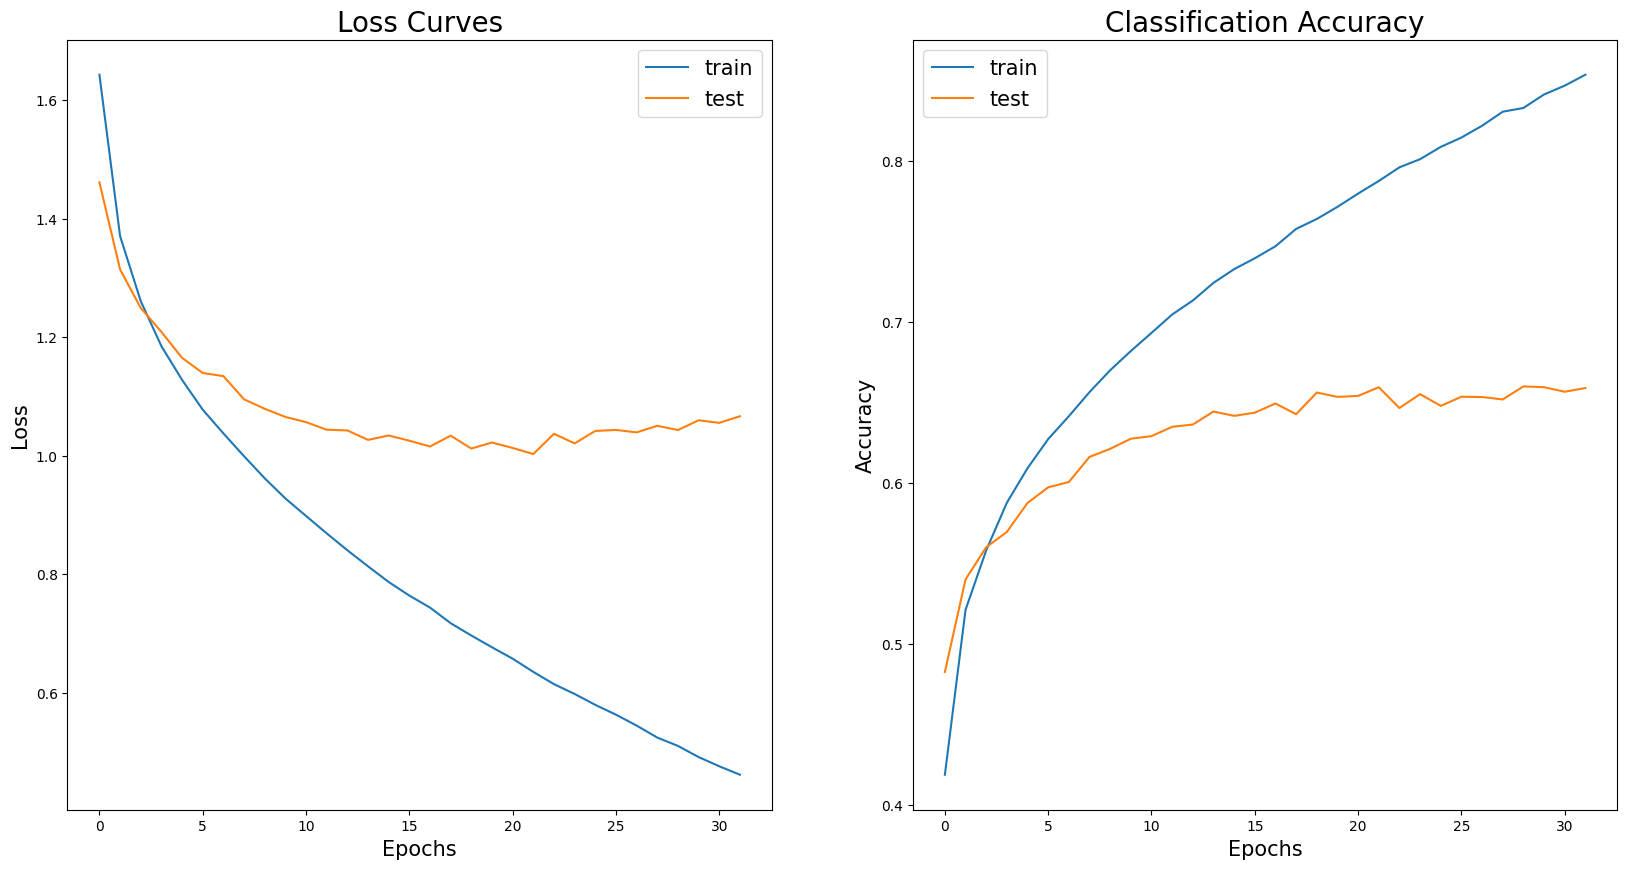

In [17]:
# define model
opt = Adam(learning_rate=0.0001)
modelCNN = twoLayerCNN(input_shape, filters1=32, filters2=64, opt=opt)
# Print model summary
modelCNN.summary()
# fit model
history = modelCNN.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=1, callbacks=[es])
# evaluate model
_, acc = modelCNN.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

# loss curves & accuracy
summarize_diagnostics(history)

# Reducing overfitting!

## Let's use dropout (The network drops out the contribution of a certain percentage of neurons when training)

In [18]:
# Redefine to include the option for dropout
def twoLayerCNN(input_size, filters1=32, filters2=64, opt=Adam(learning_rate=0.01), dropout=True):
  inputs = Input(shape=input_shape)
  conv1 = Conv2D(filters1, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_size)(inputs)
  if dropout:
    conv1 = Dropout(0.5)(conv1)
  conv2 = Conv2D(filters2, kernel_size=(3,3), activation='relu', padding='same')(conv1)
  if dropout:
    conv2 = Dropout(0.5)(conv2)
  flatten1 = Flatten()(conv2)
  outputs = Dense(10, activation='softmax')(flatten1)
  model = Model(inputs, outputs)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                6553

2022-11-15 15:29:31.346429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.6230 - accuracy: 0.4173

2022-11-15 15:31:58.519166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 149s 190ms/step - loss: 1.6230 - accuracy: 0.4173 - val_loss: 1.3378 - val_accuracy: 0.5260
Epoch 2/50
782/782 [==============================] - 31s 40ms/step - loss: 1.2649 - accuracy: 0.5534 - val_loss: 1.1773 - val_accuracy: 0.5841
Epoch 3/50
782/782 [==============================] - 31s 39ms/step - loss: 1.1462 - accuracy: 0.5972 - val_loss: 1.1238 - val_accuracy: 0.6061
Epoch 4/50
782/782 [==============================] - 31s 40ms/step - loss: 1.0467 - accuracy: 0.6343 - val_loss: 1.0674 - val_accuracy: 0.6250
Epoch 5/50
782/782 [==============================] - 30s 38ms/step - loss: 0.9619 - accuracy: 0.6617 - val_loss: 0.9990 - val_accuracy: 0.6516
Epoch 6/50
782/782 [==============================] - 30s 39ms/step - loss: 0.9001 - accuracy: 0.6883 - val_loss: 0.9674 - val_accuracy: 0.6660
Epoch 7/50
782/782 [==============================] - 32s 40ms/step - loss: 0.8549 - accuracy: 0.7014 - val_loss: 0.9601 - val_accuracy: 0.6701
E

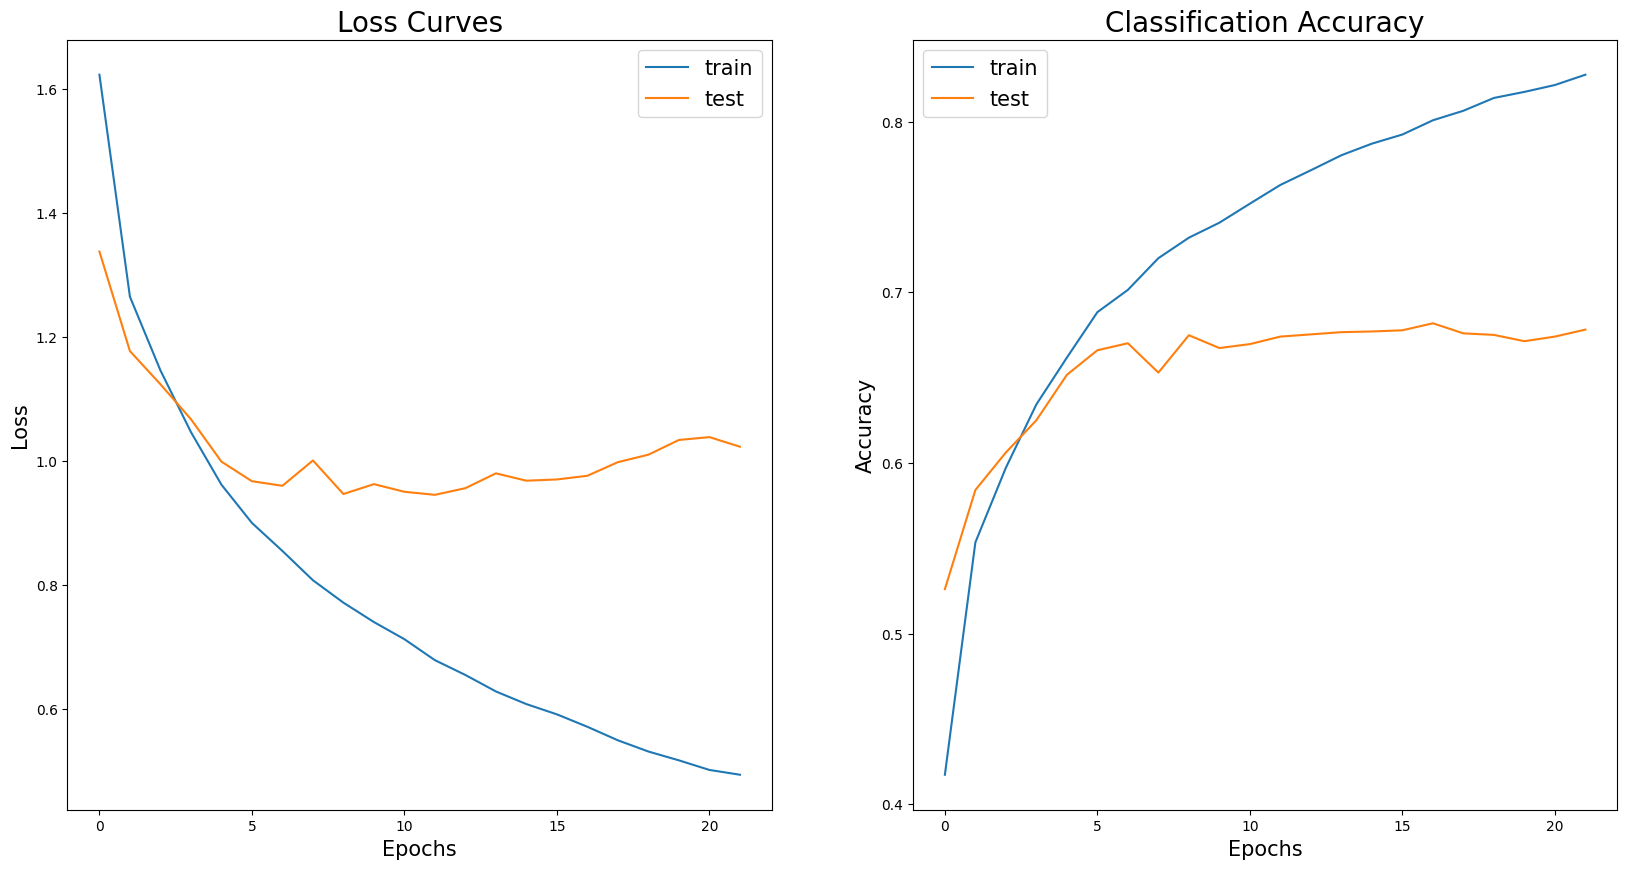

In [19]:
# define model
opt = Adam(learning_rate=0.0005)
modelCNN = twoLayerCNN(input_shape, filters1=32, filters2=64, opt=opt, dropout=True)
# Print model summary
modelCNN.summary()
# fit model
history = modelCNN.fit(trainX, trainY, epochs=50, batch_size=64, validation_data=(testX, testY), verbose=1, callbacks=[es])
# evaluate model
_, acc = modelCNN.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

# loss curves & accuracy
summarize_diagnostics(history)

## Another strategy is to use max pooling layers after convolution
The rationale is to retain only the filter outputs which are the strongest in a neighborhood. Additionally, it reduces the number of parameters a lot. Another desirable effect of max pooling is to introduce some translational invariance.

In [20]:
# Redefine to include the option for dropout
def twoLayerCNN(input_size, filters1=32, filters2=64, opt=Adam(learning_rate=0.01), dropout=True, maxpooling=True):
  inputs = Input(shape=input_shape)

  conv1 = Conv2D(filters1, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_size)(inputs)
  if maxpooling:
    conv1 = MaxPooling2D((2, 2))(conv1)
  if dropout:
    conv1 = Dropout(0.5)(conv1)

  conv2 = Conv2D(filters2, kernel_size=(3,3), activation='relu', padding='same')(conv1)
  if maxpooling:
    conv2 = MaxPooling2D((2, 2))(conv2)
  if dropout:
    conv2 = Dropout(0.5)(conv2)

  flatten1 = Flatten()(conv2)

  outputs = Dense(10, activation='softmax')(flatten1)
  
  model = Model(inputs, outputs)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 8, 8, 64)          0   

2022-11-15 15:42:53.511144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 1.7323 - accuracy: 0.3778

2022-11-15 15:43:09.701862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 18s 21ms/step - loss: 1.7323 - accuracy: 0.3778 - val_loss: 1.5561 - val_accuracy: 0.4456
Epoch 2/50
782/782 [==============================] - 16s 21ms/step - loss: 1.4546 - accuracy: 0.4816 - val_loss: 1.3527 - val_accuracy: 0.5205
Epoch 3/50
782/782 [==============================] - 16s 21ms/step - loss: 1.3276 - accuracy: 0.5295 - val_loss: 1.2477 - val_accuracy: 0.5642
Epoch 4/50
782/782 [==============================] - 16s 21ms/step - loss: 1.2497 - accuracy: 0.5632 - val_loss: 1.1679 - val_accuracy: 0.5913
Epoch 5/50
782/782 [==============================] - 16s 21ms/step - loss: 1.1958 - accuracy: 0.5796 - val_loss: 1.1377 - val_accuracy: 0.5990
Epoch 6/50
782/782 [==============================] - 16s 21ms/step - loss: 1.1472 - accuracy: 0.5994 - val_loss: 1.1120 - val_accuracy: 0.6173
Epoch 7/50
782/782 [==============================] - 18s 23ms/step - loss: 1.1097 - accuracy: 0.6095 - val_loss: 1.0513 - val_accuracy: 0.6397
Epo

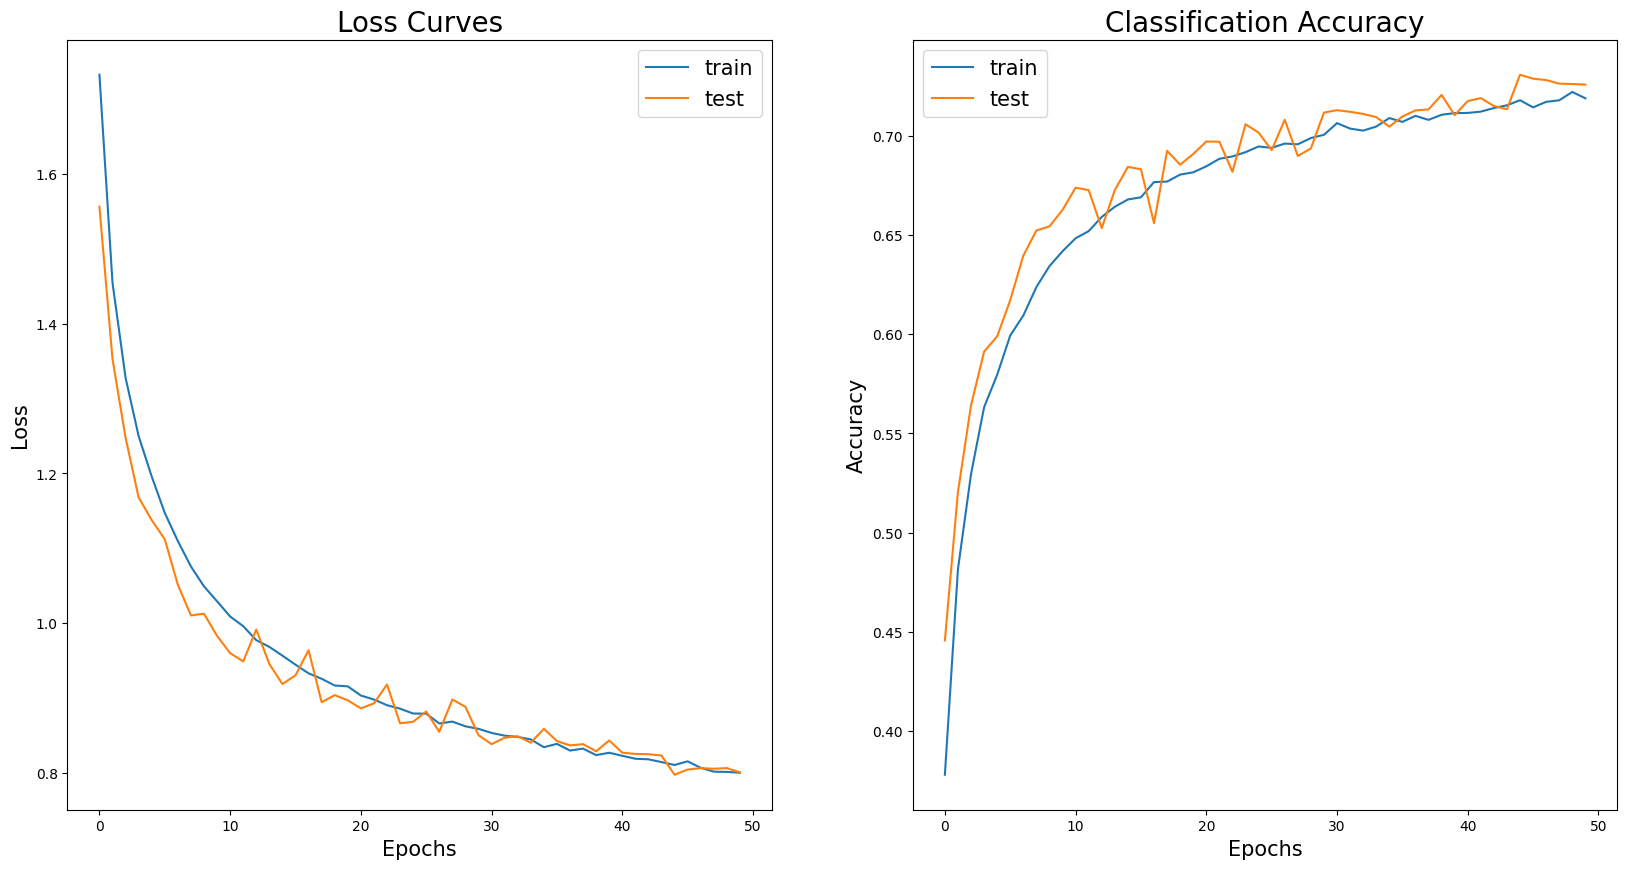

In [21]:
# define model
opt = Adam(learning_rate=0.0005)
modelCNN = twoLayerCNN(input_shape,
                       filters1=32,
                       filters2=64,
                       opt=opt,
                       dropout=True,
                       maxpooling=True)
# Print model summary
modelCNN.summary()
# fit model
history = modelCNN.fit(trainX, trainY,
                       epochs=50,
                       batch_size=64,
                       validation_data=(testX, testY),
                       verbose=1,
                       callbacks=[es])
# evaluate model
_, acc = modelCNN.evaluate(testX, testY, verbose=1)
print('> %.3f' % (acc * 100.0))

# loss curves & accuracy
summarize_diagnostics(history)